In [1]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import os
import torch
import torch.nn as nn
import torch.nn.functional as F

In [3]:
os.chdir('/content/drive/MyDrive/Master Thesis/src')
from mnist_utils import load_and_transform_mnist, transform_labels_to_binary
from trainers import *
from plots import *

In [4]:
os.chdir('/content/drive/MyDrive/Master Thesis')

MNIST_PATH = '/content/drive/MyDrive/datasets'
RESULTS_PATH = os.path.join(os.path.join(os.getcwd(), "results"), "layers=3 tanh classes=[6,8]")

In [5]:
new_dim = 10
keep_classes = [6,8]

criterion = nn.BCELoss()

def get_net():
    return nn.Sequential(
        nn.Linear(new_dim,5),
        nn.Tanh(),
        nn.Linear(5,5),
        nn.Tanh(),
        nn.Linear(5,1),
        nn.Sigmoid()
    )

def get_dataset():
    dataset = load_and_transform_mnist(MNIST_PATH, new_dim, keep_classes)
    # the following needed specifically for BCELoss
    dataset["train_targets"] = dataset["train_targets"][..., None].float()
    dataset["test_targets"] = dataset["test_targets"][..., None].float()
    return dataset

# Cubic Newton

In [6]:
CN_trainer = {}

for M_min in [1e0, 3e-1, 1e-1, 1e-2, 1e-4, 1e-8]:
    seed = 0
    max_iters = 200
    print_every = 20
    eval_every = 1
    eval_hessian_every = 1
    save_spectrum_every = 20
    save_hessian_every = 40
    save_every = max_iters
    weight_decay = 0.
    # kwargs
    M = 1.0

    model_dir = os.path.join(os.path.join(RESULTS_PATH, "CN"), f"seed={seed} M_min={M_min}")
    print(f"model_dir: {model_dir}")

    torch.manual_seed(seed)
    CN_trainer[M_min] = AdaptiveCubicNewtonTrainer(get_net(), get_dataset(), criterion, weight_decay, model_dir, M,  M_min)
    CN_trainer[M_min].load()
    print_training_stats(CN_trainer[M_min], print_every)
    #_ = CN_trainer[M_min].train(max_iters, print_every, eval_every, eval_hessian_every, save_spectrum_every, save_hessian_every, save_every)

model_dir: /content/drive/MyDrive/Master Thesis/results/layers=3 tanh classes=[6,8]/CN/seed=0 M_min=1.0
     0: train loss =  0.677507, test loss =  0.682647, M =   1.00000000, time =    0.00 sec, lambda_n = -1.101317
    20: train loss =  0.030381, test loss =  0.031411, M =   1.00000000, time =    3.86 sec, lambda_n = -0.012881
    40: train loss =  0.017389, test loss =  0.022435, M =   1.00000000, time =    7.49 sec, lambda_n = -0.000485
    60: train loss =  0.015638, test loss =  0.020058, M =   1.00000000, time =   11.09 sec, lambda_n = -0.000136
    80: train loss =  0.015141, test loss =  0.018949, M =   1.00000000, time =   14.97 sec, lambda_n = -0.000514
   100: train loss =  0.014832, test loss =  0.018312, M =   1.00000000, time =   18.62 sec, lambda_n = -0.000256
   120: train loss =  0.014635, test loss =  0.017970, M =   1.00000000, time =   22.51 sec, lambda_n = -0.000298
   140: train loss =  0.014476, test loss =  0.017814, M =   1.00000000, time =   26.12 sec, lambd

In [9]:
min(CN_trainer[1e-8].metrics["M"])

1e-08

In [10]:
print_test_accuracy(CN_trainer[1e-8])

Best test accuracy: 99.38%
Last test accuracy: 98.60%


In [11]:
print_test_accuracy(CN_trainer[1e-4])

Best test accuracy: 99.38%
Last test accuracy: 98.65%


In [12]:
print_test_accuracy(CN_trainer[1e-2])

Best test accuracy: 99.33%
Last test accuracy: 98.81%


In [14]:
print_test_accuracy(CN_trainer[1e-1])

Best test accuracy: 99.53%
Last test accuracy: 99.22%


In [15]:
print_test_accuracy(CN_trainer[3e-1])

Best test accuracy: 99.53%
Last test accuracy: 99.17%


In [16]:
print_test_accuracy(CN_trainer[1e0])

Best test accuracy: 99.53%
Last test accuracy: 99.38%


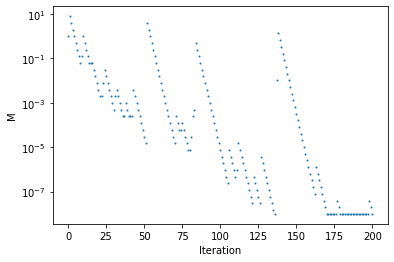

In [17]:
plot_M(CN_trainer[1e-8])

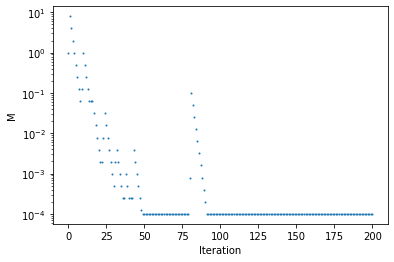

In [18]:
plot_M(CN_trainer[1e-4])

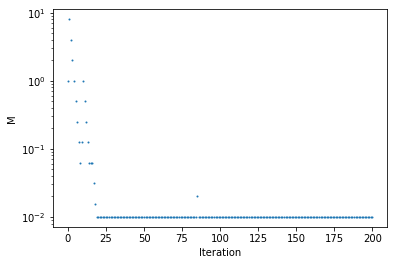

In [19]:
plot_M(CN_trainer[1e-2])

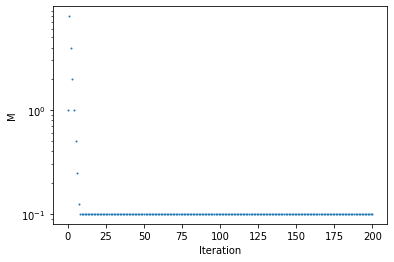

In [20]:
plot_M(CN_trainer[1e-1])

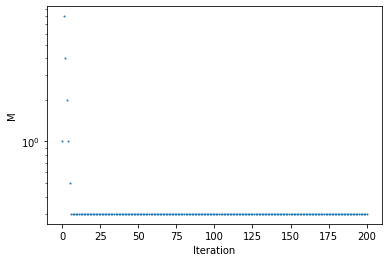

In [21]:
plot_M(CN_trainer[3e-1])

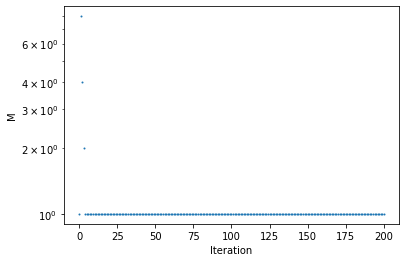

In [22]:
plot_M(CN_trainer[1e0])

min eigenvalue of (H + Mr/2*I) over all observed iterations:  0.00000006


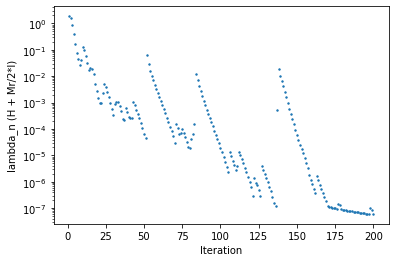

In [23]:
plot_psd_ness(CN_trainer[1e-8])

min eigenvalue of (H + Mr/2*I) over all observed iterations:  0.00004056


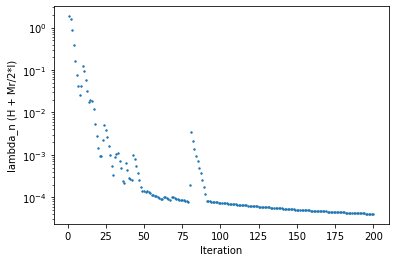

In [24]:
plot_psd_ness(CN_trainer[1e-4])

min eigenvalue of (H + Mr/2*I) over all observed iterations:  0.00102536


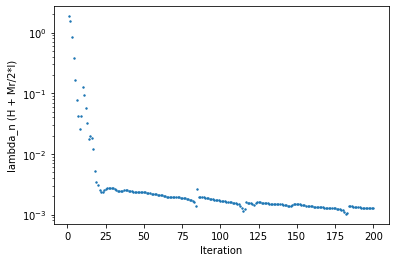

In [25]:
plot_psd_ness(CN_trainer[1e-2])

min eigenvalue of (H + Mr/2*I) over all observed iterations:  0.00587874


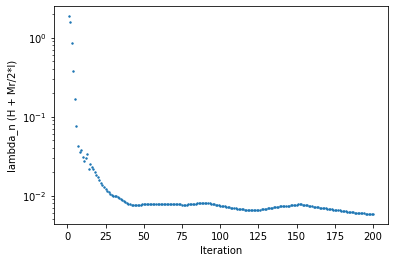

In [26]:
plot_psd_ness(CN_trainer[1e-1])

min eigenvalue of (H + Mr/2*I) over all observed iterations:  0.01155464


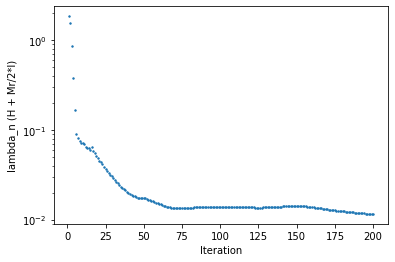

In [27]:
plot_psd_ness(CN_trainer[3e-1])

min eigenvalue of (H + Mr/2*I) over all observed iterations:  0.02475470


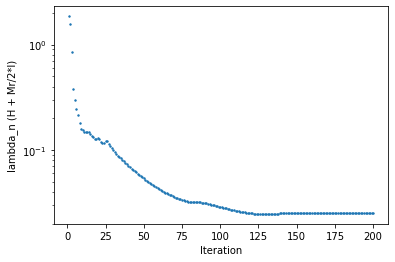

In [28]:
plot_psd_ness(CN_trainer[1e0])

In [1]:
#visualize_spectrum_evolution(CN_trainer[1e-8], plot_every_iter=1, bin_size=0.5, y_range=(0, 90))

In [2]:
#visualize_spectrum_evolution(CN_trainer[1e-4], plot_every_iter=1, bin_size=0.5, y_range=(0, 90))

In [3]:
#visualize_spectrum_evolution(CN_trainer[1e-2], plot_every_iter=1, bin_size=0.2, y_range=(0, 90))

In [4]:
#visualize_spectrum_evolution(CN_trainer[1e-1], plot_every_iter=1, bin_size=0.2, y_range=(0, 90))

In [5]:
#visualize_spectrum_evolution(CN_trainer[3e-1], plot_every_iter=1, bin_size=0.2, y_range=(0, 90))

In [6]:
#visualize_spectrum_evolution(CN_trainer[1e0], plot_every_iter=1, bin_size=0.2, y_range=(0, 90))

In [7]:
#visualize_hessians_evolution(CN_trainer[1e-8], plot_every_iter=1)

In [8]:
#visualize_hessians_evolution(CN_trainer[1e-4], plot_every_iter=1)

In [9]:
#visualize_hessians_evolution(CN_trainer[1e-2], plot_every_iter=1)

In [10]:
#visualize_hessians_evolution(CN_trainer[1e-1], plot_every_iter=1)

In [11]:
#visualize_hessians_evolution(CN_trainer[3e-1], plot_every_iter=1)

In [12]:
#visualize_hessians_evolution(CN_trainer[1e0], plot_every_iter=1)

# plot (Cubic Newton versions)

In [7]:
metrics = []
hessian_metrics = []
labels = []

for M_min in [1e0, 3e-1, 1e-1, 1e-2, 1e-4, 1e-8]:
    metrics.append(get_metrics(CN_trainer[M_min]))
    hessian_metrics.append(get_hessian_metrics(CN_trainer[M_min]))
    labels.append(f"M_min={M_min}")

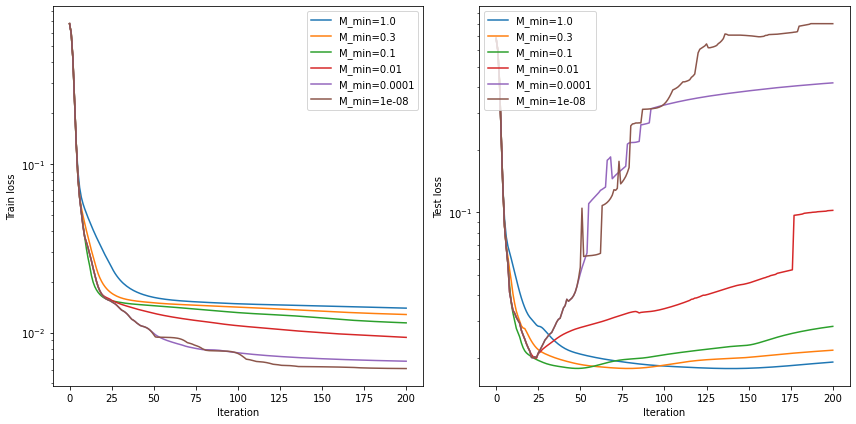

In [8]:
plot_losses(metrics, labels)

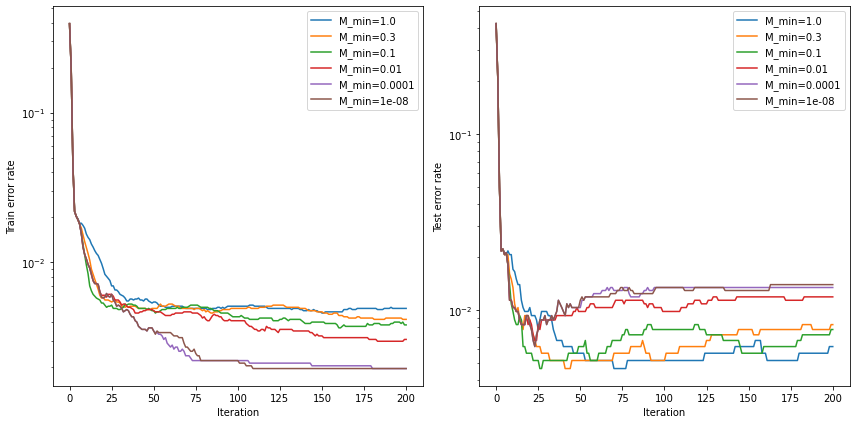

In [38]:
plot_errors(metrics, labels)

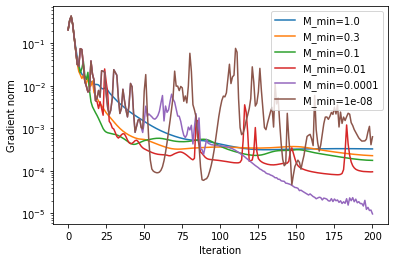

In [39]:
plot_grad_norms(metrics, labels)

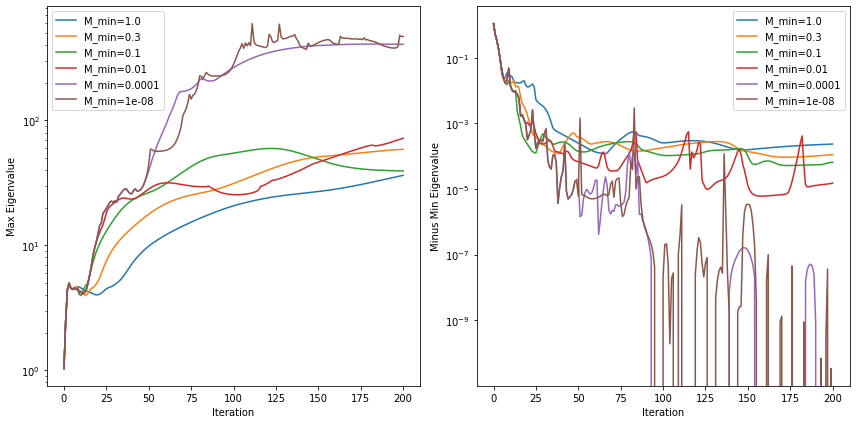

In [9]:
plot_max_min_eigvals(hessian_metrics, labels, yscale='log')

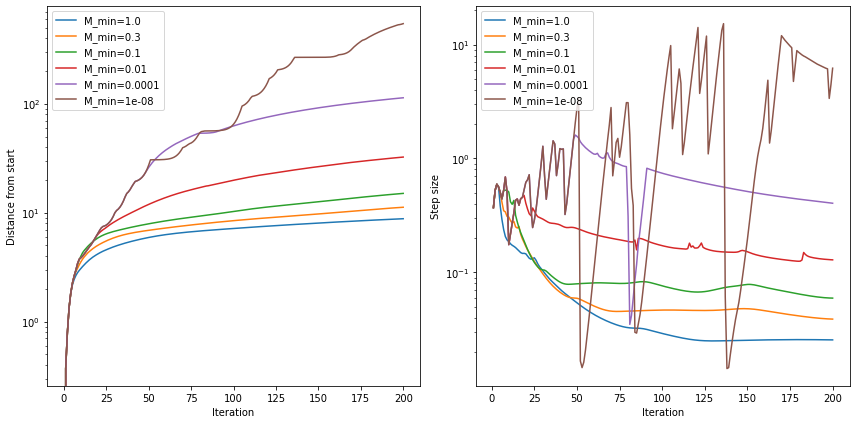

In [10]:
plot_distances(metrics, labels, yscale='log')

# Gradient Descent

In [42]:
seed = 0
max_iters = 4000
print_every = 200
eval_every = 10
eval_hessian_every = 50
save_spectrum_every = 500
save_hessian_every = None
save_every = max_iters
weight_decay = 0.
# kwargs
L = 1.0
L_min = 1e-3

model_dir = os.path.join(os.path.join(RESULTS_PATH, "GD"), f"seed={seed} L_min={L_min}")
print(f"model_dir: {model_dir}")

torch.manual_seed(seed)
GD_trainer = AdaptiveGDTrainer(get_net(), get_dataset(), criterion, weight_decay, model_dir, L, L_min)
GD_trainer.load()
print_training_stats(GD_trainer, print_every)
#_ = GD_trainer.train(max_iters, print_every, eval_every, eval_hessian_every, save_spectrum_every, save_hessian_every, save_every)

model_dir: /content/drive/MyDrive/Master Thesis/results/layers=3 tanh classes=[6,8]/GD/seed=0 L_min=0.001
     0: train loss =  0.677507, test loss =  0.682647, L =   1.00000000, time =    0.00 sec, lambda_n = -1.101317
   200: train loss =  0.039345, test loss =  0.040062, L =   1.00000000, time =    1.27 sec, lambda_n = -0.008920
   400: train loss =  0.030922, test loss =  0.026810, L =   2.00000000, time =    2.57 sec, lambda_n = -0.017875
   600: train loss =  0.025461, test loss =  0.024704, L =   2.00000000, time =    3.82 sec, lambda_n = -0.011511
   800: train loss =  0.021804, test loss =  0.025696, L =   4.00000000, time =    5.09 sec, lambda_n = -0.004447
 1,000: train loss =  0.020140, test loss =  0.025628, L =   2.00000000, time =    6.37 sec, lambda_n = -0.004023
 1,200: train loss =  0.018956, test loss =  0.025282, L =   4.00000000, time =    7.63 sec, lambda_n = -0.002053
 1,400: train loss =  0.018074, test loss =  0.024819, L =   2.00000000, time =    9.06 sec, lam

In [43]:
print_test_accuracy(GD_trainer)

Best test accuracy: 99.38%
Last test accuracy: 99.33%


In [13]:
#visualize_spectrum_evolution(GD_trainer, y_range=(0, 90), bin_size=0.1)

# SGD

In [44]:
seed = 0
max_iters = 4000
print_every = 200
eval_every = 10
eval_hessian_every = 50
save_spectrum_every = 500
save_hessian_every = None
save_every = max_iters
weight_decay =0.
# kwargs
optim_class = torch.optim.SGD
optim_params = {'lr': 0.1}
dataset = get_dataset()
batch_size = 64

model_dir = os.path.join(os.path.join(RESULTS_PATH, "SGD"), f"seed={seed} lr={optim_params['lr']}, batch_size={batch_size}")
print(f"model_dir: {model_dir}")

torch.manual_seed(seed)
SGD_trainer = CustomTrainer(get_net(), get_dataset(), criterion, weight_decay, model_dir, optim_class, optim_params, batch_size)
SGD_trainer.load()
print_training_stats(SGD_trainer, print_every)
#_ = SGD_trainer.train(max_iters, print_every, eval_every, eval_hessian_every, save_spectrum_every, save_hessian_every, save_every)

model_dir: /content/drive/MyDrive/Master Thesis/results/layers=3 tanh classes=[6,8]/SGD/seed=0 lr=0.1, batch_size=64
     0: train loss =  0.677507, test loss =  0.682647, time =    0.00 sec, lambda_n = -1.101317
   200: train loss =  0.069623, test loss =  0.073356, time =    0.16 sec, lambda_n = -0.046034
   400: train loss =  0.058961, test loss =  0.068094, time =    0.33 sec, lambda_n = -0.226370
   600: train loss =  0.055205, test loss =  0.055241, time =    0.50 sec, lambda_n = -0.041911
   800: train loss =  0.050893, test loss =  0.056902, time =    0.66 sec, lambda_n = -0.272267
 1,000: train loss =  0.043940, test loss =  0.046539, time =    0.83 sec, lambda_n = -0.049280
 1,200: train loss =  0.041401, test loss =  0.039961, time =    1.00 sec, lambda_n = -0.054891
 1,400: train loss =  0.037324, test loss =  0.035249, time =    1.16 sec, lambda_n = -0.037192
 1,600: train loss =  0.034535, test loss =  0.034216, time =    1.32 sec, lambda_n = -0.023820
 1,800: train loss 

In [45]:
print_test_accuracy(SGD_trainer)

Best test accuracy: 99.28%
Last test accuracy: 99.02%


In [14]:
#visualize_spectrum_evolution(SGD_trainer, y_range=(0,80), bin_size=0.05)

# Plots

In [46]:
metrics = [get_metrics(CN_trainer[1e-1]), get_metrics(GD_trainer), get_metrics(SGD_trainer)]
hessian_metrics = [get_hessian_metrics(CN_trainer[1e-1]), get_hessian_metrics(GD_trainer), get_hessian_metrics(SGD_trainer)]
labels = ["CN", "GD", "SGD"]

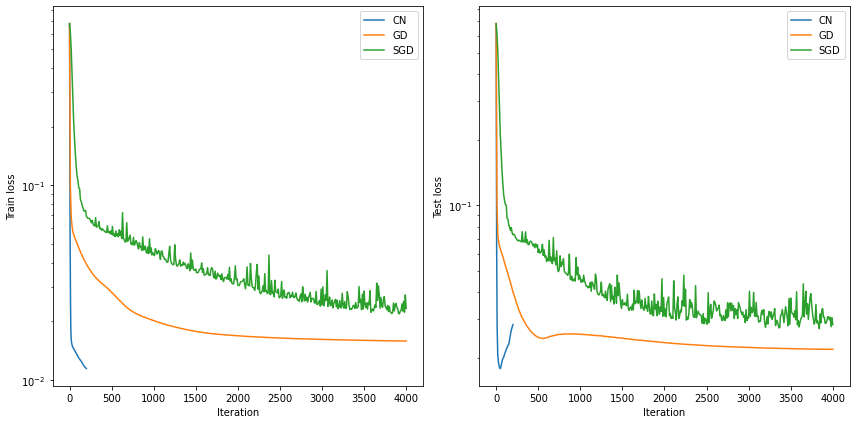

In [47]:
plot_losses(metrics, labels)

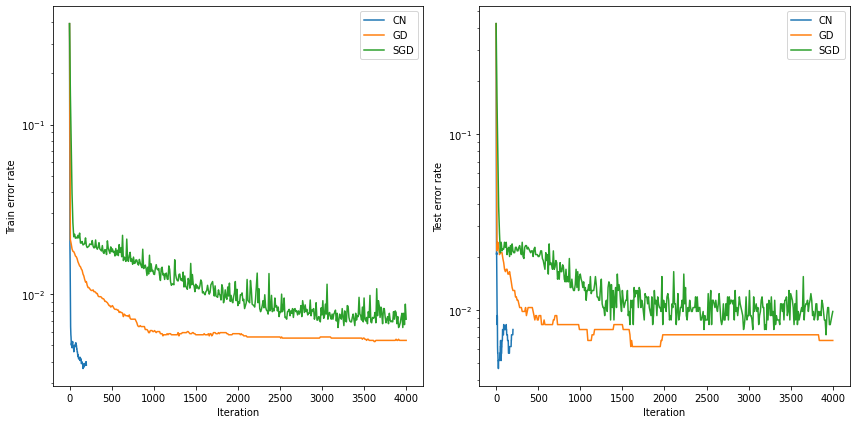

In [48]:
plot_errors(metrics, labels)

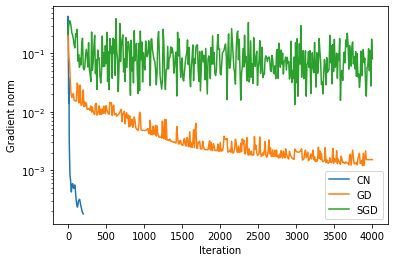

In [49]:
plot_grad_norms(metrics, labels)

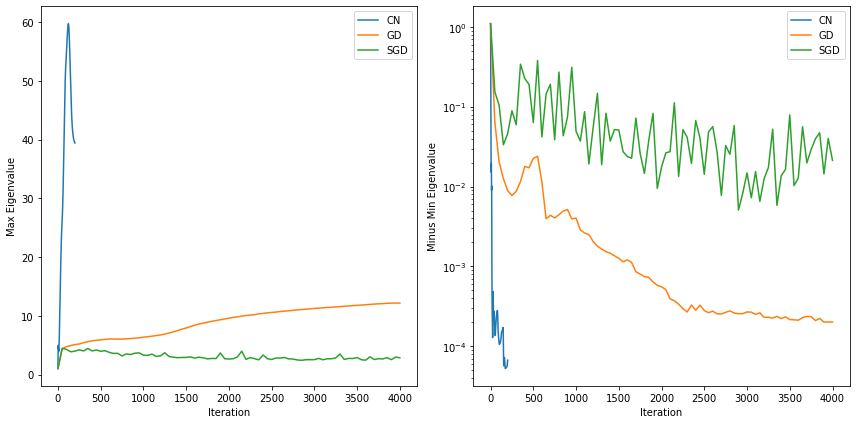

In [50]:
plot_max_min_eigvals(hessian_metrics, labels)

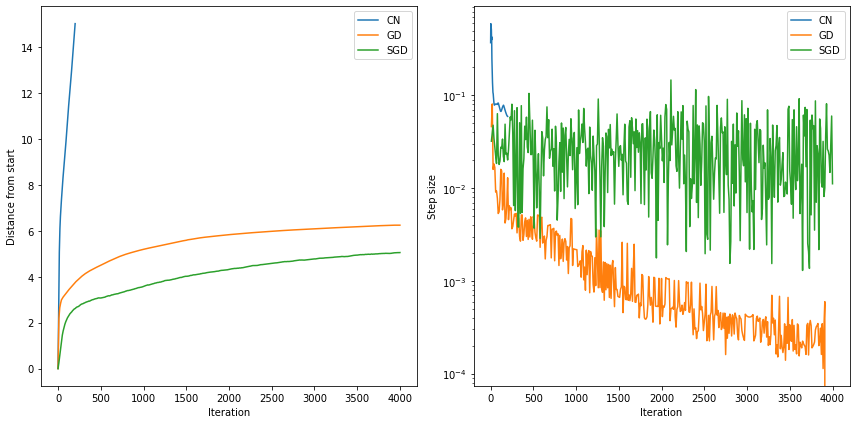

In [51]:
plot_distances(metrics, labels)